# 6.1 Social Media: Example



In [33]:
import pandas as pd

import numpy as np

In [34]:
page = pd.read_csv('social_media_demo.csv')

In [35]:
page.head(10)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/30/2018 11:00,3742,55,436,3156,521,60,5,0,0
1,photo,4/28/2018 11:00,2923,40,156,2564,302,56,1,0,0
2,photo,4/27/2018 11:00,3751,27,142,3321,400,27,2,1,0
3,video,4/26/2018 11:00,4542,82,258,3955,528,48,11,0,0
4,video,4/25/2018 11:00,10191,159,1473,8722,1351,107,8,2,1
5,video,4/23/2018 12:20,805,25,99,683,110,12,0,0,0
6,video,4/18/2018 12:00,39038,1382,9351,28777,9035,1184,26,13,3
7,video,4/17/2018 4:00,20,0,0,18,2,0,0,0,0
8,video,4/16/2018 11:47,4033,65,521,3305,665,60,2,0,1
9,video,4/15/2018 11:00,895,12,63,806,84,2,0,0,3


In [36]:
page.groupby('status_type').sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
link,116194,1662,6341,104358,10905,843,36,16,8
photo,4710927,32553,145939,4369615,293974,43055,3116,586,506
video,6435994,122816,846775,5568259,726281,128462,8773,1657,1822


In [37]:
page1= page.loc[:,'num_reactions':'num_angrys']

In [38]:
page1.head(5)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3742,55,436,3156,521,60,5,0,0
1,2923,40,156,2564,302,56,1,0,0
2,3751,27,142,3321,400,27,2,1,0
3,4542,82,258,3955,528,48,11,0,0
4,10191,159,1473,8722,1351,107,8,2,1


In [39]:
page.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,39519.701754,550.985965,3505.456140,35235.901754,3618.105263,604.771930,41.842105,7.926316,8.196491
std,98053.257814,1410.605778,11403.267424,88776.454844,8602.987218,2313.098431,135.898133,21.875243,32.381800
min,20.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4676.000000,50.000000,272.000000,4264.000000,446.000000,32.000000,2.000000,0.000000,0.000000
50%,8077.000000,104.000000,539.000000,7077.000000,876.000000,67.000000,5.000000,1.000000,1.000000
75%,19214.000000,344.000000,1841.000000,16269.000000,2652.000000,218.000000,19.000000,4.000000,4.000000
max,908718.000000,13025.000000,137713.000000,854778.000000,64559.000000,25541.000000,1815.000000,213.000000,458.000000


### Missing Value


In [40]:
page1.isnull().any().any()

False

## Outlier Detection

Why care about outliers? There are a couple of reasons:

Outliers distort the picture of the data we obtain using descriptive statitics and data visualization. When our goal is to understand the data, it is often worthwhile to disregard outliers.
Outliers play havoc with many machine learning algorithms and statistical models. When our goal is to predict, our models are often improved by ignoring outliers.
Outliers can be exactly what we want to learn about, especially for tasks like anomaly detection.

More [info](http://colingorrie.github.io/outlier-detection.html)

### Method 1 - IQR

It was developed by [John Tukey](https://www.google.com/search?q=john+tukey+outliers&oq=john+tukey+outliers&aqs=chrome..69i57.4843j0j7&sourceid=chrome&ie=UTF-8)

A box-and-whisker plot uses quartiles (points that divide the data into four groups of equal size) to plot the shape of the data. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles. The line inside the box represents the 2nd quartile, which is the median.

The interquartile range, which gives this method of outlier detection its name, is the range between the first and the third quartiles (the edges of the box). Tukey considered any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside” or “far out”. In a classic box-and-whisker plot, the ‘whiskers’ extend up to the last data point that is not “outside”.

In [41]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

#### to get the positions (indexes) of outliers

In [42]:
pos = outliers_iqr(page1.num_reactions)
pos

(array([ 42,  43,  44,  76,  79,  81, 102, 103, 104, 105, 106, 125, 135,
        136, 137, 138, 146, 147, 153, 154, 163, 167, 169, 170, 171, 172,
        173, 175, 188, 194, 209, 210, 211, 218, 229, 230, 231, 235, 239,
        240, 241, 242, 243, 252, 253, 254, 259, 263, 273, 274, 275, 276],
       dtype=int64),)

#### to get the reactions correponding to first pos, ie index=42

In [43]:
page1.iloc[pos[0][0]]

num_reactions    98699
num_comments       584
num_shares        3505
num_likes        92297
num_loves         5532
num_wows           733
num_hahas          100
num_sads            21
num_angrys          16
Name: 42, dtype: int64

#### to get the reactions correponding to all outliers

In [44]:
page1.iloc[pos[0]]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
42,98699,584,3505,92297,5532,733,100,21,16
43,92646,2926,26036,69626,19292,3576,83,18,51
44,174330,1589,8897,152036,19410,2583,237,19,45
76,85654,1191,6904,75302,8649,1552,122,14,15
79,76117,839,4300,66429,8766,850,54,11,7
81,54988,530,3623,48144,5846,928,55,7,8
102,63445,488,2951,59393,3586,412,36,7,11
103,54202,656,4287,48258,4763,1127,38,5,11
104,95844,1773,13660,84951,9210,1593,60,19,11
105,78151,344,1379,73280,4421,391,40,8,11


#### Let us investigate the post with the highest number of reactions

In [45]:
page1.num_reactions.values.argmax() # to get the index

172

In [46]:
page1.iloc[172].num_reactions

908718

#### Method 2 - Z-score method

The Z-score, or standard score, is a way of describing a data point in terms of its relationship to the mean and standard deviation of a group of points. Taking a Z-score is simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1.

The goal of taking Z-scores is to remove the effects of the location and scale of the data, allowing different datasets to be compared directly. The intuition behind the Z-score method of outlier detection is that, once we’ve centred and rescaled the data, anything that is too far from zero (the threshold is usually a Z-score of 3 or -3) should be considered an outlier.

In [47]:
import numpy as np

def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

#### Note:

The Z-score method relies on the mean and standard deviation of a group of data to measure central tendency and dispersion. This is troublesome, because the mean and standard deviation are highly affected by outliers – they are not **robust**. In fact, the skewing that outliers bring is one of the biggest reasons for finding and removing outliers from a dataset!

#### Method 3 - Modified Z-score method

Another drawback of the Z-score method is that it behaves strangely in small datasets – in fact, the Z-score method will never detect an outlier if the dataset has fewer than 12 items in it. This motivated the development of a modified Z-score method, which does not suffer from the same limitation

In [48]:
import numpy as np

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

## Exercise

Use method 3 to get the outliers for all columns of chanel1

## Demo: Clustering

In [52]:
page['Dates'] = pd.to_datetime(page.status_published,format="%m/%d/%Y %H:%M").dt.date
page['Time'] = pd.to_datetime(page.status_published,format="%m/%d/%Y %H:%M").dt.time

In [53]:

page2 = page.groupby('Dates').median()
page2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
Dates,,,,,,,,,
2017-01-01,26008.0,318.0,2316.0,23075.0,2786.0,136.0,8.0,3.0,0.0
2017-01-05,6854.0,111.0,492.0,6182.0,596.0,65.0,7.0,4.0,0.0
2017-01-10,7084.0,83.0,537.0,6403.0,623.0,54.0,3.0,1.0,0.0
2017-01-11,18704.0,426.0,3686.0,16480.0,2044.0,170.0,7.0,1.0,2.0
2017-01-14,8260.0,105.0,405.0,7679.0,526.0,48.0,5.0,1.0,1.0
2017-01-16,7046.0,73.0,974.0,6317.0,665.0,54.0,5.0,4.0,1.0
2017-01-17,14629.0,275.0,1135.0,13438.0,1060.0,116.0,13.0,2.0,0.0
2017-01-20,4699.0,84.0,311.0,4369.0,300.0,28.0,2.0,0.0,0.0
2017-01-24,404867.0,2680.0,16363.0,370449.0,30112.0,3957.0,260.0,46.0,43.0


In [54]:
page2.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,40968.262172,571.994382,3661.983146,36528.443820,3742.250936,634.397004,43.344569,8.265918,8.501873
std,100731.210810,1445.409019,11742.270980,91227.841139,8807.517026,2385.188357,139.423852,22.462259,33.190029
min,20.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4722.500000,52.500000,275.500000,4307.000000,461.000000,34.000000,2.000000,0.000000,0.000000
50%,8190.000000,105.000000,539.000000,7128.000000,903.000000,68.000000,5.000000,1.000000,1.000000
75%,21160.500000,369.500000,2206.500000,17831.250000,2734.000000,213.500000,19.750000,4.000000,4.500000
max,908718.000000,13025.000000,137713.000000,854778.000000,64559.000000,25541.000000,1815.000000,213.000000,458.000000


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Scatterplot')

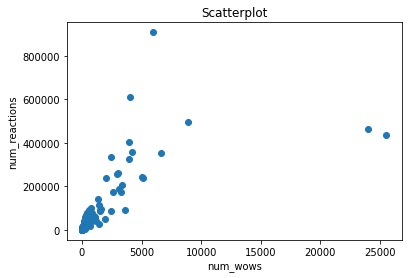

In [56]:
plt.scatter(page2.num_wows, page2.num_reactions);
plt.xlabel('num_wows')
plt.ylabel('num_reactions')
plt.title('Scatterplot')

In [58]:
dist = pd.concat([page2.num_wows, page2.num_reactions], axis=1, join_axes=[page2.num_wows.index])
dist

,num_wows,num_reactions
Dates,,
2017-01-01,136.0,26008.0
2017-01-05,65.0,6854.0
2017-01-10,54.0,7084.0
2017-01-11,170.0,18704.0
2017-01-14,48.0,8260.0
2017-01-16,54.0,7046.0
2017-01-17,116.0,14629.0
2017-01-20,28.0,4699.0
2017-01-24,3957.0,404867.0


In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dist)
y_kmeans = kmeans.predict(dist)

[[1.99439516e+02 1.71911734e+04]
 [6.31743750e+03 2.91122250e+05]
 [6.28133333e+03 6.72386333e+05]]


Text(0.5,1,'Date -  Clustering')

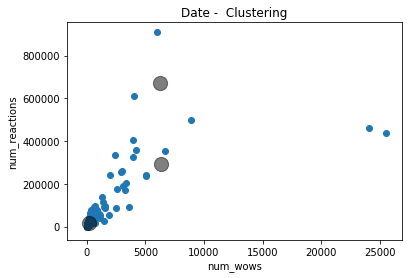

In [64]:
plt.scatter(dist.num_wows, dist.num_reactions);
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('num_wows')
plt.ylabel('num_reactions')
plt.title('Date -  Clustering')

## Another Example

In [65]:
page1.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.755614,0.668469,0.998243,0.895817,0.698814,0.548865,0.768386,0.509459
num_comments,0.755614,1.000000,0.945788,0.721004,0.926385,0.857601,0.640949,0.861429,0.622142
num_shares,0.668469,0.945788,1.000000,0.627153,0.892180,0.908012,0.425921,0.735427,0.514355
num_likes,0.998243,0.721004,0.627153,1.000000,0.868439,0.659955,0.539957,0.743754,0.481149
num_loves,0.895817,0.926385,0.892180,0.868439,1.000000,0.874015,0.547224,0.851886,0.639536
num_wows,0.698814,0.857601,0.908012,0.659955,0.874015,1.000000,0.431404,0.789370,0.688157
num_hahas,0.548865,0.640949,0.425921,0.539957,0.547224,0.431404,1.000000,0.793677,0.680007
num_sads,0.768386,0.861429,0.735427,0.743754,0.851886,0.789370,0.793677,1.000000,0.866861
num_angrys,0.509459,0.622142,0.514355,0.481149,0.639536,0.688157,0.680007,0.866861,1.000000


In [67]:
corr = page1.corr()

In [68]:
import seaborn as sns
%matplotlib inline

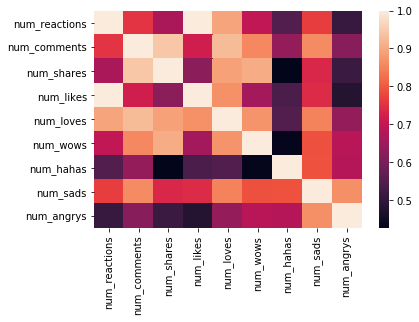

In [69]:

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [70]:
corr[corr>0.7] # use 0.7 as threshold

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.755614,NaN,0.998243,0.895817,NaN,NaN,0.768386,NaN
num_comments,0.755614,1.000000,0.945788,0.721004,0.926385,0.857601,NaN,0.861429,NaN
num_shares,NaN,0.945788,1.000000,NaN,0.892180,0.908012,NaN,0.735427,NaN
num_likes,0.998243,0.721004,NaN,1.000000,0.868439,NaN,NaN,0.743754,NaN
num_loves,0.895817,0.926385,0.892180,0.868439,1.000000,0.874015,NaN,0.851886,NaN
num_wows,NaN,0.857601,0.908012,NaN,0.874015,1.000000,NaN,0.789370,NaN
num_hahas,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.793677,NaN
num_sads,0.768386,0.861429,0.735427,0.743754,0.851886,0.789370,0.793677,1.000000,0.866861
num_angrys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866861,1.000000


Text(0.5,1,'Malaysiakini Post (Original)')

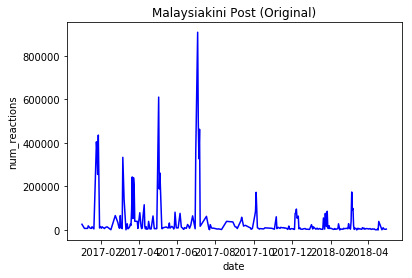

In [71]:
# plt.subplot(1,2,2)
plt.plot(page2.index, page2.num_reactions, 'b')
plt.xlabel('date')
plt.ylabel('num_reactions')
plt.title('Malaysiakini Post (Original)')

## Any periodicity

In [72]:
Y = np.fft.fft(page2.num_reactions)

In [89]:
N = int(len(Y)/2+1)
dt = page2.index[-1] - page2.index[0]

print(dt.days/N)
fs = 1.0/(dt.days/N) 
print('dt= {} (Sample Time).'.format(dt.days/N))
print('fs= {} (Sampling Freq).'.format(fs))

3.611940298507463
dt= 3.611940298507463 (Sample Time).
fs= 0.27685950413223137 (Sampling Freq).


Text(0,0.5,'Magnitude')

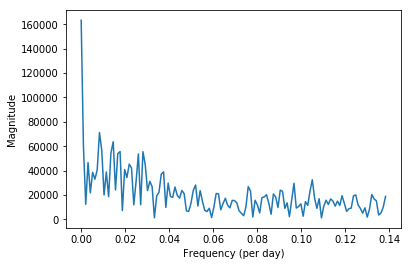

In [90]:
X = np.linspace(0, fs/2, N, endpoint=True)
plt.plot(X, 2*np.abs(Y[:N])/N)
plt.xlabel('Frequency (per day)')
plt.ylabel('Magnitude')

In [108]:
values = 2*np.abs(Y[1:N])/N
np.argmax(values)
print ("the possible seasonality is: {} days".format( 1/X[np.argmax(values)])) #

the possible seasonality is: 137.25373134328362 days
